<h1>DAVI CA2 Part 1<h1>
<h3>Name : Isaac Low Zu Le</h3>
<h3>Class: DAAA/FT/2A/03</h3>

<h5>Objective: To identify how gpa is distributed and how it relates to other variables</h5>

<hr>
<h2>Step 1: Exploratory Data Analysis</h2>

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

df=pd.read_excel('.\Data and metadata\Student Profiles.xlsx')
course_code_df=pd.read_excel('.\Data and metadata\Course Codes.xlsx')

In [2]:
df.head()

,STUDENT ID,SALUTATION,GENDER,NATIONALITY,LOCAL,FOREIGN,DOB,HIGHEST QUALIFICATION,NAME OF QUALIFICATION AND INSTITUTION,DATE ATTAINED HIGHEST QUALIFICATION,DESIGNATION,INTAKE NO,COMMENCEMENT DATE,COMPLETION DATE,FULL-TIME OR PART-TIME,COURSE FUNDING,REGISTRATION FEE,PAYMENT MODE,COURSE FEE,GPA
0,2020/1101-013/001,Ms,F,Singaporean,Y,,04/03/1978,Certificate,"Certificate in Office Skills, ITE",2016-11-06,"Snr Associate, Client Services",13th,2020-01-06,2021-04-06 00:00:00,Part-Time,Individual - SFC,107,NETS,1712,3.0
1,2020/1101-013/002,Ms,F,Singaporean,Y,,23/03/1966,Certificate,"WSQ Higher Certificate in Human Resources, WPL...",2018-02-06,Admin Officer,13th,2020-01-06,2021-04-06 00:00:00,Part-Time,Individual,107,NETS,1712,2.5
2,2020/1101-013/003,Ms,F,Singaporean,Y,NaN,04/12/1988,Certificate,"Nitec in Service Skills (Office), ITE",2016-11-06,Admin Assistant,13th,2020-01-06,2021-04-06 00:00:00,Part-Time,Sponsored - no SDF,107,CC JPM,1712,2.0
3,2020/1101-014/004,Ms,F,Singaporean,Y,NaN,27/11/1991,Degree,Bachelor Science (Facilities & Events Manageme...,2017-06-10,HR Administrator,14th,2020-03-10,2021-06-09 00:00:00,Part-Time,Individual - SFC,107,NETS,1212,2.5
4,2020/1101-014/005,Ms,F,Singaporean,Y,,23/04/1985,Diploma,"Diploma in Procurement and Supply Management, ...",2016-08-10,Purchasing Executive,14th,2020-03-10,2021-06-09 00:00:00,Part-Time,Individual - SFC,107,NETS,1712,2.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   STUDENT ID                             244 non-null    object        
 1   SALUTATION                             244 non-null    object        
 2   GENDER                                 244 non-null    object        
 3   NATIONALITY                            244 non-null    object        
 4   LOCAL                                  229 non-null    object        
 5   FOREIGN                                120 non-null    object        
 6   DOB                                    244 non-null    object        
 7   HIGHEST QUALIFICATION                  244 non-null    object        
 8   NAME OF QUALIFICATION AND INSTITUTION  244 non-null    object        
 9   DATE ATTAINED HIGHEST QUALIFICATION    244 non-null    datetime64

In [4]:
course_code_df.head()

,CourseCode,CourseName
0,1101,Diploma in Business Administration
1,1102,Diploma in Business Analytics
2,2101,Certificate in HR Management
3,2102,Certificate in Digital Marketing
4,2013,Certificate in Tourism Management


In [5]:
print("Missing Values in Dataframe:", end="\n")
df.isnull().sum()


Missing Values in Dataframe:


STUDENT ID                                 0
SALUTATION                                 0
GENDER                                     0
NATIONALITY                                0
LOCAL                                     15
FOREIGN                                  124
DOB                                        0
HIGHEST QUALIFICATION                      0
NAME OF QUALIFICATION AND INSTITUTION      0
DATE ATTAINED HIGHEST QUALIFICATION        0
DESIGNATION                                0
INTAKE NO                                  0
COMMENCEMENT DATE                          0
COMPLETION DATE                            0
FULL-TIME OR PART-TIME                     0
COURSE FUNDING                             0
REGISTRATION FEE                           0
PAYMENT MODE                               0
COURSE FEE                                 0
GPA                                        0
dtype: int64

In [6]:
print("Unique in Dataframe:", end="\n")
df.nunique()

Unique in Dataframe:


STUDENT ID                               244
SALUTATION                                 4
GENDER                                     2
NATIONALITY                               19
LOCAL                                      2
FOREIGN                                    2
DOB                                      236
HIGHEST QUALIFICATION                      8
NAME OF QUALIFICATION AND INSTITUTION    210
DATE ATTAINED HIGHEST QUALIFICATION      201
DESIGNATION                              147
INTAKE NO                                 28
COMMENCEMENT DATE                         33
COMPLETION DATE                           34
FULL-TIME OR PART-TIME                     1
COURSE FUNDING                            17
REGISTRATION FEE                           3
PAYMENT MODE                              23
COURSE FEE                                14
GPA                                       26
dtype: int64

In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'STUDENT ID':
['2020/1101-013/001' '2020/1101-013/002' '2020/1101-013/003'
 '2020/1101-014/004' '2020/1101-014/005' '2020/1101-014/006'
 '2020/1101-014/008' '2020/1101-015/009' '2020/1101-015/010'
 '2020/1101-015/011' '2020/1101-016/012' '2020/1101-016/013'
 '2020/1101-016/014' '2020/1101-017/015' '2020/1101-017/016'
 '2020/1101-017/017' '2020/1101-017/018' '2020/1101-017/019'
 '2019/1101-007/001' '2019/1101-007/002' '2019/1101-007/003'
 '2019/1101-007/004' '2019/1101-007/005' '2019/1101-008/006'
 '2019/1101-008/007' '2019/1101-008/008' '2019/1101-008/009'
 '2019/1101-009/010' '2019/1101-009/011' '2019/1101-010/012'
 '2019/1101-010/013' '2019/1101-010/014' '2019/1101-010/015'
 '2019/1101-010/016' '2019/1101-010/017' '2019/1101-010/019'
 '2019/1101-010/020' '2019/1101-010/021' '2019/1101-010/022'
 '2019/1101-010/023' '2019/1101-010/024' '2019/1101-011/025'
 '2019/1101-011/026' '2019/1101-011/027' '2019/1101-011/028'
 '2019/1101-011/029' '2019/1101-012/030' '2019/

In [8]:
df.to_csv('filename.csv', index=False)

<hr>
<h2>Step 2: Cleanse and wrangle the data</h2>

after seeing the different datatypes and noticing inconsistencies(such as "Mr" and "Mr ", NATIONALITY having some spaces after certain nationalities, LOCAL and FOREIGN columns having more than 2 values annd empty values, DOB having an inconsistent format, DESIGNATION having an inconsistent format for NA values, INTAKE NO being a string instead of an interger, FULL-TIME or PART-TIME column only having one value making it useless)

In [9]:
# date parser function to try and convert the date into standard pandas format YYY-MM-DD
def parse_date(date):
    try:
        return pd.to_datetime(date, format='%d/%m/%Y')
    except ValueError:
        try:
            return pd.to_datetime(date, format='%d-%m-%Y')
        except ValueError:
            return pd.to_datetime(date, format='%d-%b-%Y')


# apply the date parser function to the date columns
df['DOB'] = df['DOB'].apply(parse_date)
df['COMPLETION DATE'] = df['COMPLETION DATE'].apply(parse_date)

# encode local into 1 and 0 and drop foreign column as data being repeated

df.drop('FOREIGN', axis=1, inplace=True)
df['LOCAL'] = df['LOCAL'].str.replace('Y', '1')
df['LOCAL'] = df['LOCAL'].str.replace(' ', '0')
df['LOCAL'] = df['LOCAL'].fillna('0')

# make registration fee a numeric column and prevent mixed data types(string and int)
df['REGISTRATION FEE'] = df['REGISTRATION FEE'].apply(lambda x: 0 if x == 'Waived' else 107)

# strip all unnnecessary whitespaces from every entry
for col in df.columns:
    if df[col].dtype == 'object':  
        df[col] = df[col].str.strip()


# standardize the designations to have a uniform format
df['DESIGNATION'] = df['DESIGNATION'].replace(['', 'N.A.'], '-')

# replace all empty values with a dashh
df.replace("", "-", inplace=True)

In [10]:
# view the unique values soo i have a sensing on wether data cleaning is successful
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'STUDENT ID':
['2020/1101-013/001' '2020/1101-013/002' '2020/1101-013/003'
 '2020/1101-014/004' '2020/1101-014/005' '2020/1101-014/006'
 '2020/1101-014/008' '2020/1101-015/009' '2020/1101-015/010'
 '2020/1101-015/011' '2020/1101-016/012' '2020/1101-016/013'
 '2020/1101-016/014' '2020/1101-017/015' '2020/1101-017/016'
 '2020/1101-017/017' '2020/1101-017/018' '2020/1101-017/019'
 '2019/1101-007/001' '2019/1101-007/002' '2019/1101-007/003'
 '2019/1101-007/004' '2019/1101-007/005' '2019/1101-008/006'
 '2019/1101-008/007' '2019/1101-008/008' '2019/1101-008/009'
 '2019/1101-009/010' '2019/1101-009/011' '2019/1101-010/012'
 '2019/1101-010/013' '2019/1101-010/014' '2019/1101-010/015'
 '2019/1101-010/016' '2019/1101-010/017' '2019/1101-010/019'
 '2019/1101-010/020' '2019/1101-010/021' '2019/1101-010/022'
 '2019/1101-010/023' '2019/1101-010/024' '2019/1101-011/025'
 '2019/1101-011/026' '2019/1101-011/027' '2019/1101-011/028'
 '2019/1101-011/029' '2019/1101-012/030' '2019/

In [11]:
# Function to extract Course Code
def extract_course_code(student_id):
    parts = student_id.split('/')
    course_part = parts[1].split('-')[0]
    return int(course_part)

# Function to extract Index Number
def extract_index_number(student_id):
    parts = student_id.split('/')
    index_part = parts[2]
    return int(index_part)

# Apply the functions to create new columns so that i can merge coursecode and index number to the main dataframe
df['COURSE CODE'] = df['STUDENT ID'].apply(extract_course_code)
df['INDEX NUMBER'] = df['STUDENT ID'].apply(extract_index_number)

# add an age column to make it easier to compare details to age
current_date = pd.to_datetime('today')
df['AGE'] = ((current_date - df['DOB']).dt.days / 365.25).astype(int)

# encode gender column to 1 and 0 for male and female
df['GENDER'] = df['GENDER'].replace({'M': 1, 'F': 0})

# frop full timee or part time column as they only contain part time and are not useful
df.drop('FULL-TIME OR PART-TIME', axis=1, inplace=True)

# encode the course funding into a numeric value, 1 for yes and 0 for no
df = df.rename(columns={'COURSE FUNDING': 'SPONSORED'})
df['SPONSORED'] = df['SPONSORED'].apply(lambda x: '1' if 'sponsored' in x.lower() else '0')

# standardise Highest qualification
df['HIGHEST QUALIFICATION'] = df['HIGHEST QUALIFICATION'].replace('Postgraduate Diploma/\nDegree', 'Postgraduate Diploma')


# turn date of time from last qualification into a numeric value
df['TIME FROM LAST QUALIFICATION'] = df['COMMENCEMENT DATE'] - df['DATE ATTAINED HIGHEST QUALIFICATION']


In [12]:
print("Missing Values in Dataframe:", end="\n")
print(df.isnull().sum(), end="\n\n")

Missing Values in Dataframe:
STUDENT ID                               0
SALUTATION                               0
GENDER                                   0
NATIONALITY                              0
LOCAL                                    0
DOB                                      0
HIGHEST QUALIFICATION                    0
NAME OF QUALIFICATION AND INSTITUTION    0
DATE ATTAINED HIGHEST QUALIFICATION      0
DESIGNATION                              0
INTAKE NO                                0
COMMENCEMENT DATE                        0
COMPLETION DATE                          0
SPONSORED                                0
REGISTRATION FEE                         0
PAYMENT MODE                             0
COURSE FEE                               0
GPA                                      0
COURSE CODE                              0
INDEX NUMBER                             0
AGE                                      0
TIME FROM LAST QUALIFICATION             0
dtype: int64



In [13]:
df

,STUDENT ID,SALUTATION,GENDER,NATIONALITY,LOCAL,DOB,HIGHEST QUALIFICATION,NAME OF QUALIFICATION AND INSTITUTION,DATE ATTAINED HIGHEST QUALIFICATION,DESIGNATION,...,COMPLETION DATE,SPONSORED,REGISTRATION FEE,PAYMENT MODE,COURSE FEE,GPA,COURSE CODE,INDEX NUMBER,AGE,TIME FROM LAST QUALIFICATION
0,2020/1101-013/001,Ms,0,Singaporean,1,1978-03-04,Certificate,"Certificate in Office Skills, ITE",2016-11-06,"Snr Associate, Client Services",...,2021-04-06,0,107,NETS,1712,3.0,1101,1,46,1156 days
1,2020/1101-013/002,Ms,0,Singaporean,1,1966-03-23,Certificate,"WSQ Higher Certificate in Human Resources, WPL...",2018-02-06,Admin Officer,...,2021-04-06,0,107,NETS,1712,2.5,1101,2,58,699 days
2,2020/1101-013/003,Ms,0,Singaporean,1,1988-12-04,Certificate,"Nitec in Service Skills (Office), ITE",2016-11-06,Admin Assistant,...,2021-04-06,1,107,CC JPM,1712,2.0,1101,3,35,1156 days
3,2020/1101-014/004,Ms,0,Singaporean,1,1991-11-27,Degree,Bachelor Science (Facilities & Events Manageme...,2017-06-10,HR Administrator,...,2021-06-09,0,107,NETS,1212,2.5,1101,4,32,1004 days
4,2020/1101-014/005,Ms,0,Singaporean,1,1985-04-23,Diploma,"Diploma in Procurement and Supply Management, ...",2016-08-10,Purchasing Executive,...,2021-06-09,0,107,NETS,1712,2.4,1101,5,39,1308 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2019/5113-007/005,Ms,0,Singaporean,1,1973-10-01,Degree,Bachelor of Commerce (Accounting and Finance)/...,2017-11-05,"Head, Registry & Corp Admin",...,2020-01-04,0,107,Nets,5803,2.9,5113,5,50,607 days
240,2019/5113-007/006,Ms,0,Indonesian (PR),1,1982-09-30,Degree,Bachelor of Economics (Accounting)/\nUniversit...,2016-05-05,Finance Officer,...,2020-01-04,0,107,Nets,5803,2.0,5113,6,41,1156 days
241,2019/5113-006/003,Ms,0,Singaporean,1,1990-03-06,Degree,Bachelor of Science in Hotel Administration (H...,2015-06-08,HR Assistant,...,2019-09-07,0,107,Nets,5803,2.8,5113,3,34,1369 days
242,2019/5113-005/001,Ms,0,Singaporean,1,1981-11-14,Degree,Bachelor of Arts with Second Class Honours (Lo...,2014-08-04,Household Goods Coordinator,...,2019-07-03,0,107,Nets,5803,1.9,5113,1,42,1614 days


In [14]:
# rename course code and course name to match the main dataframe
course_code_df = course_code_df.rename(columns={'CourseCode': 'COURSE CODE'})
course_code_df = course_code_df.rename(columns={'CourseName': 'COURSE NAME'})

In [15]:
course_code_df

,COURSE CODE,COURSE NAME
0,1101,Diploma in Business Administration
1,1102,Diploma in Business Analytics
2,2101,Certificate in HR Management
3,2102,Certificate in Digital Marketing
4,2013,Certificate in Tourism Management
5,5112,Bachelor of Business Administration
6,5113,Master of Business Administration


In [16]:
# merge the two dataframes on course code
df = pd.merge(df, course_code_df, on='COURSE CODE', how='left')

In [17]:
df

,STUDENT ID,SALUTATION,GENDER,NATIONALITY,LOCAL,DOB,HIGHEST QUALIFICATION,NAME OF QUALIFICATION AND INSTITUTION,DATE ATTAINED HIGHEST QUALIFICATION,DESIGNATION,...,SPONSORED,REGISTRATION FEE,PAYMENT MODE,COURSE FEE,GPA,COURSE CODE,INDEX NUMBER,AGE,TIME FROM LAST QUALIFICATION,COURSE NAME
0,2020/1101-013/001,Ms,0,Singaporean,1,1978-03-04,Certificate,"Certificate in Office Skills, ITE",2016-11-06,"Snr Associate, Client Services",...,0,107,NETS,1712,3.0,1101,1,46,1156 days,Diploma in Business Administration
1,2020/1101-013/002,Ms,0,Singaporean,1,1966-03-23,Certificate,"WSQ Higher Certificate in Human Resources, WPL...",2018-02-06,Admin Officer,...,0,107,NETS,1712,2.5,1101,2,58,699 days,Diploma in Business Administration
2,2020/1101-013/003,Ms,0,Singaporean,1,1988-12-04,Certificate,"Nitec in Service Skills (Office), ITE",2016-11-06,Admin Assistant,...,1,107,CC JPM,1712,2.0,1101,3,35,1156 days,Diploma in Business Administration
3,2020/1101-014/004,Ms,0,Singaporean,1,1991-11-27,Degree,Bachelor Science (Facilities & Events Manageme...,2017-06-10,HR Administrator,...,0,107,NETS,1212,2.5,1101,4,32,1004 days,Diploma in Business Administration
4,2020/1101-014/005,Ms,0,Singaporean,1,1985-04-23,Diploma,"Diploma in Procurement and Supply Management, ...",2016-08-10,Purchasing Executive,...,0,107,NETS,1712,2.4,1101,5,39,1308 days,Diploma in Business Administration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2019/5113-007/005,Ms,0,Singaporean,1,1973-10-01,Degree,Bachelor of Commerce (Accounting and Finance)/...,2017-11-05,"Head, Registry & Corp Admin",...,0,107,Nets,5803,2.9,5113,5,50,607 days,Master of Business Administration
240,2019/5113-007/006,Ms,0,Indonesian (PR),1,1982-09-30,Degree,Bachelor of Economics (Accounting)/\nUniversit...,2016-05-05,Finance Officer,...,0,107,Nets,5803,2.0,5113,6,41,1156 days,Master of Business Administration
241,2019/5113-006/003,Ms,0,Singaporean,1,1990-03-06,Degree,Bachelor of Science in Hotel Administration (H...,2015-06-08,HR Assistant,...,0,107,Nets,5803,2.8,5113,3,34,1369 days,Master of Business Administration
242,2019/5113-005/001,Ms,0,Singaporean,1,1981-11-14,Degree,Bachelor of Arts with Second Class Honours (Lo...,2014-08-04,Household Goods Coordinator,...,0,107,Nets,5803,1.9,5113,1,42,1614 days,Master of Business Administration


In [18]:
df.to_csv('cleaned_data.csv', index=False)

<hr>
<h2>Step 3: Data Visualisation and analyses</h2>

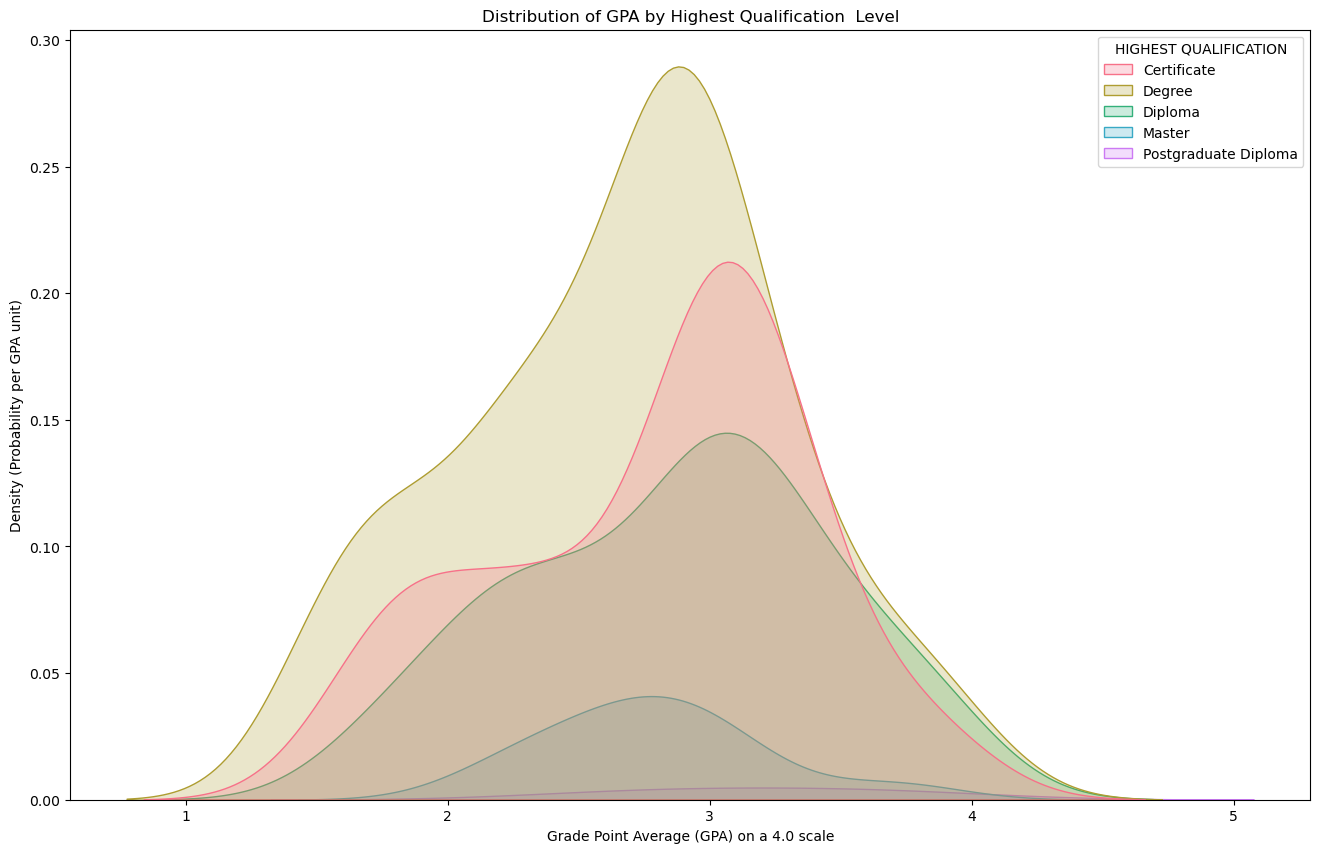

In [19]:
# Filter the dataframe to exclude certain categories such as 'Graduate Diploma' and '-'
filtered_df = df[~df['HIGHEST QUALIFICATION'].isin(['Graduate Diploma', '-'])]

# Perform Univariate Analysis: Distribution of GPA across different highest qualifications
plt.figure(figsize=(16, 10))  # Set the size of the plot
sns.kdeplot(data=filtered_df, x="GPA", hue="HIGHEST QUALIFICATION", fill=True, palette='husl')  # Plot the KDE (Kernel Density Estimation) plot
plt.title('Distribution of GPA by Highest Qualification  Level')  # Set the title of the plot
plt.xlabel('Grade Point Average (GPA) on a 4.0 scale')  # Set the label for the x-axis
plt.ylabel('Density (Probability per GPA unit)')  # Set the label for the y-axis
plt.show()  # Display the plot



<h5>1 the plot shows that People with diplomas tend to score the best at this institute,  scoring around 3.1, followed by people with just a certificate at around 3.0, then by people with degrees and Masters. post graduate diplomas do not ccontain enough examples to show an accurate depiction. this is quite counterintuitive as people with higher qualifications are scoring lower in this program
<br><br>

2 the distribution for all the graphs are unimodal, with most of the graphs being negatively skewed except Masters degrees that are positively skewed
this means that:The majority of students have higher GPAs, with the bulk of the data concentrated on the right side of the distribution.
There is a longer tail extending to the left, representing fewer students with lower GPAs.
and the inverse is true for students with Masters degrees<h5>

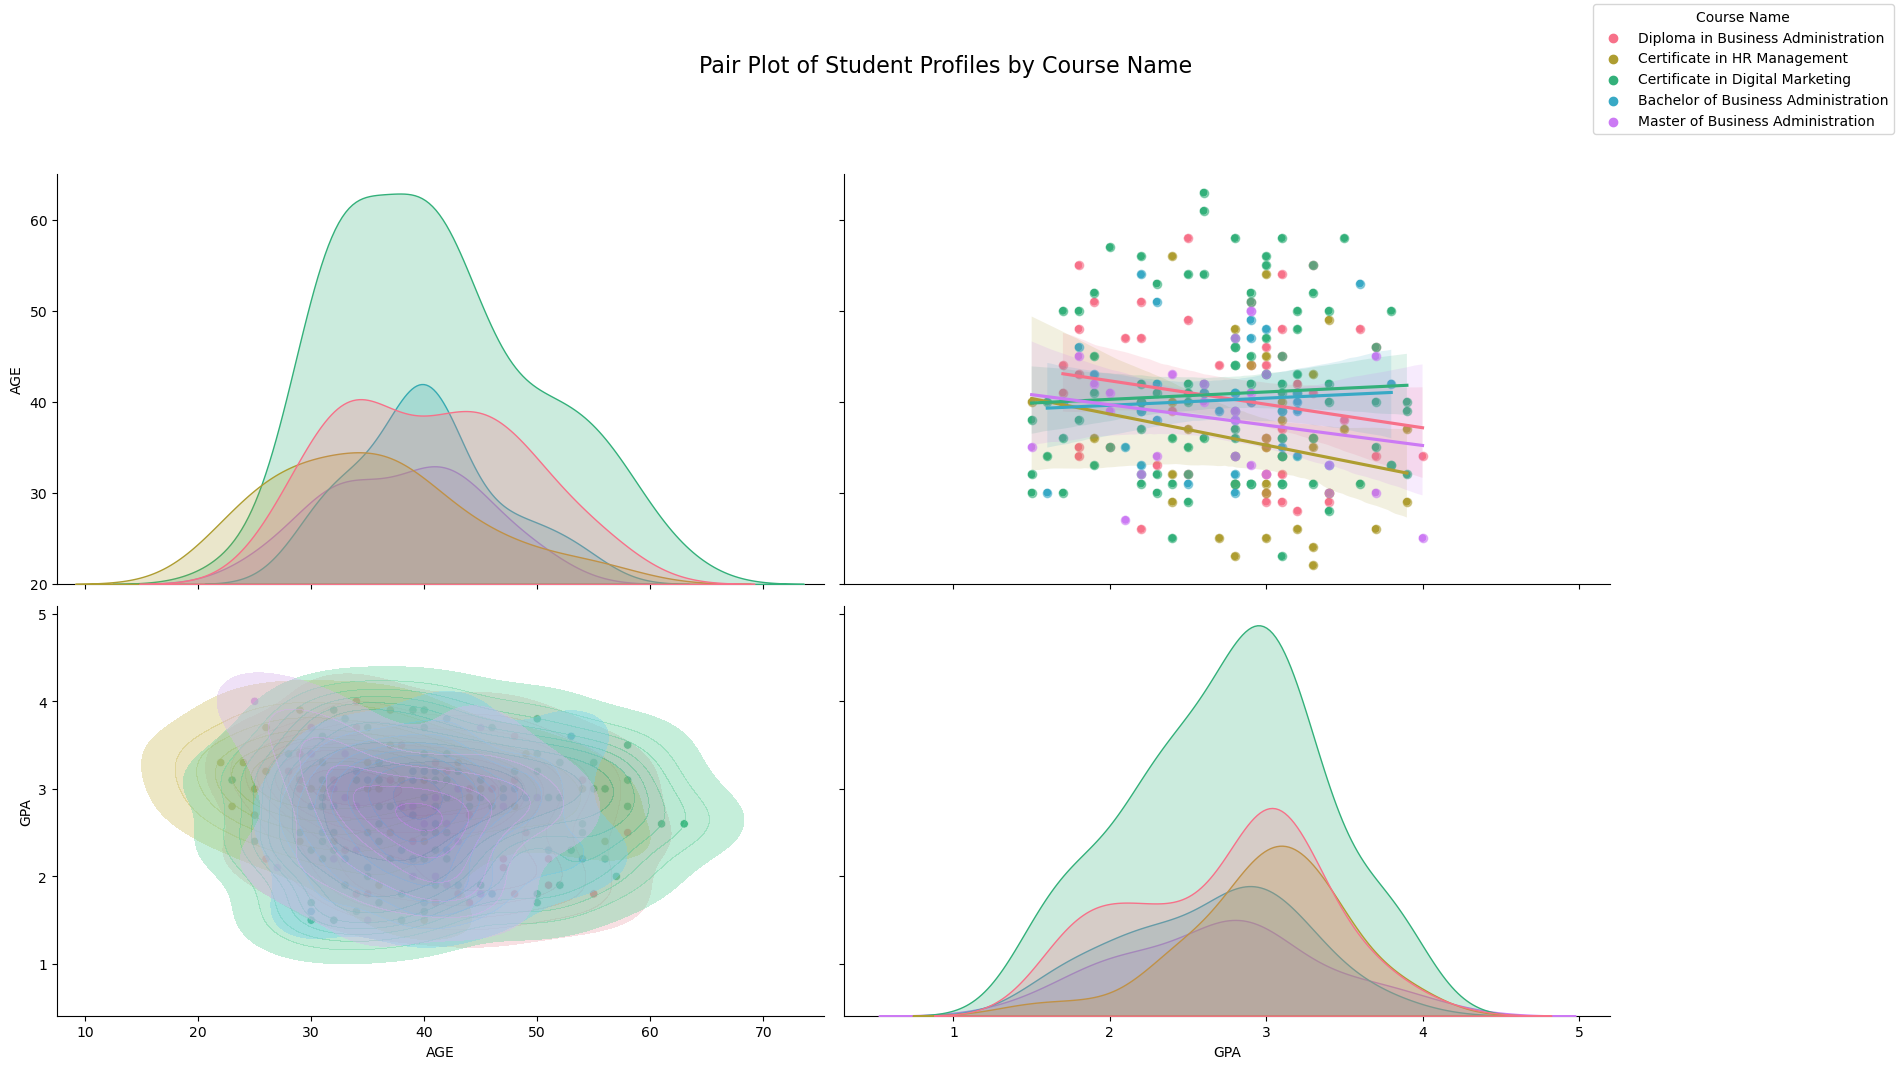

In [20]:
# Create a pairplot of 'AGE' and 'GPA', colored by 'COURSE NAME'
g = sns.pairplot(df, hue='COURSE NAME', vars=['AGE', 'GPA'], height=5, aspect=1.6, palette='husl')

# main title 
g.fig.suptitle('Pair Plot of Student Profiles by Course Name', y=1.02, fontsize=16)

# Add KDE plots
g.map_lower(sns.kdeplot, cmap='Blues_d', shade=True, shade_lowest=False, alpha=0.4)

# Add regression lines 
g.map_upper(sns.regplot, scatter_kws={'alpha':0.5}, ci=95)

# Customize the legend
g._legend.set_title('Course Name')
g._legend.set_bbox_to_anchor((1, 1))
g._legend.set_frame_on(True)

# Adjust the layout to prevent overlapping
g.fig.tight_layout(rect=[0, 0, 0.85, 1])
g.fig.subplots_adjust(top=0.9, right=0.85)


plt.show()


<h5>1 GPA distributions across all courses are unimodal with negative skew, indicating most students achieve higher GPAs while a smaller group pulls the average down. Mode GPAs range from 2.8 to 3.0, with Certificate in HR Management and Diploma in Business Administration at the top. This consistent pattern suggests <br><br>2 a need to investigate factors affecting lower-performing students and potentially review grading practices or support systems.
Age distributions reveal intriguing patterns. Master and Diploma of Business Administration programs show bimodal age distributions, suggesting they attract both early-career professionals and more experienced individuals. Other courses have unimodal age distributions, with Bachelor of Business Administration having the highest mode age at 40, while certificate courses attract younger professionals with mode ages around 30-31.
<br><br>3 The relationship between GPA and age shows weak correlations across all courses, with r-scores ranging from -0.20 to 0.07. This indicates that age is not a strong predictor of academic performance. The slight variations in correlation direction and strength might reflect subtle differences in how age relates to GPA in different programs, but overall, other factors are likely more influential in determining academic success.<h5>

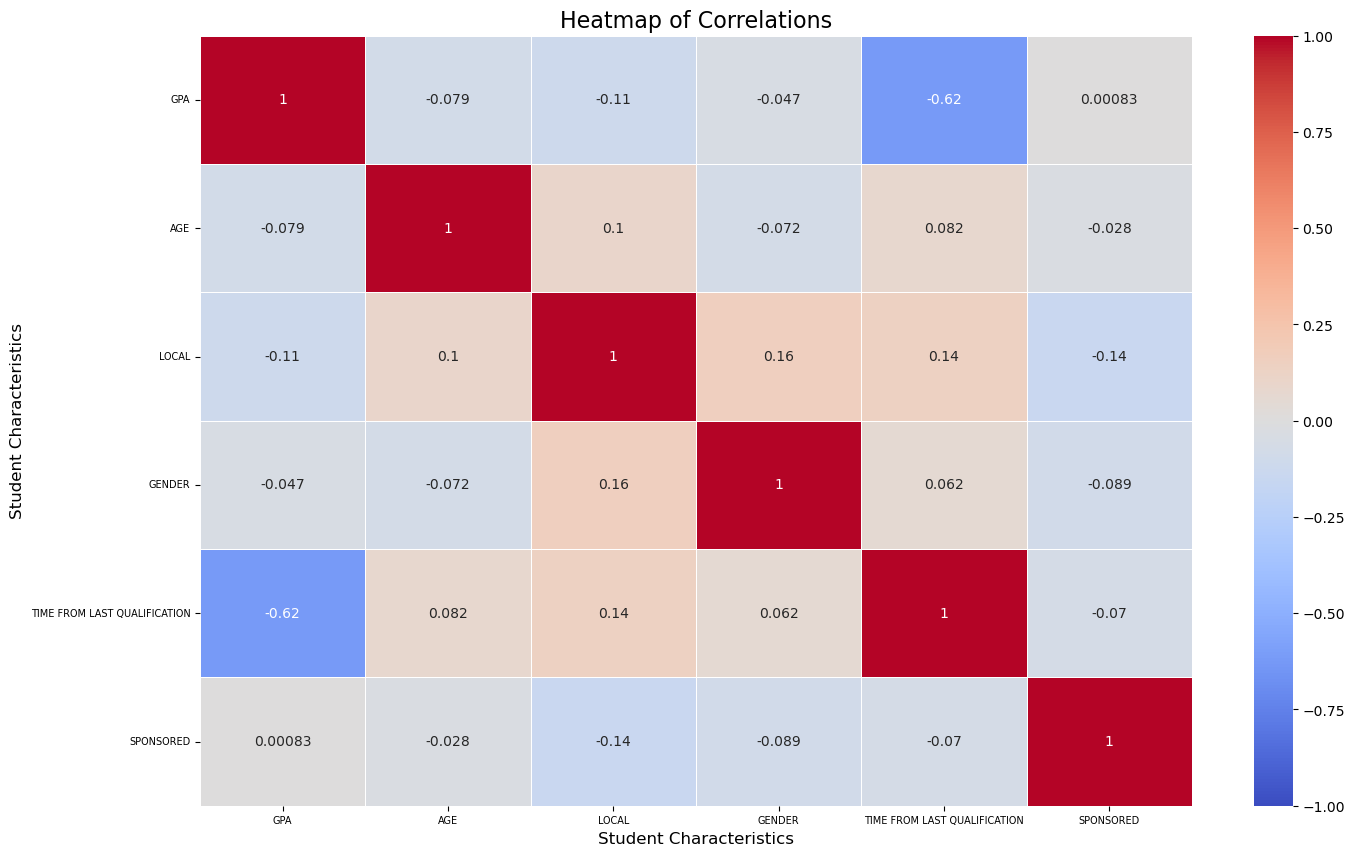

In [21]:
# Calculate correlation matrix
corr = df[['GPA', 'AGE', 'LOCAL', 'GENDER', 'TIME FROM LAST QUALIFICATION', 'SPONSORED']].corr()


# Customize size
plt.figure(figsize=(16, 10))  

# Create a heatmap 
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True, linewidths=0.5, linecolor='white') 

# Set title
plt.title("Heatmap of Correlations", fontsize=16)  

# Set font size for x-axis
plt.xticks(fontsize=7)  

# Set font size for y-axis
plt.yticks(fontsize=7)  

# Add label for x-axis
plt.xlabel('Student Characteristics', fontsize=12)

# Add label for y-axis
plt.ylabel('Student Characteristics', fontsize=12)

# Rotate x-axis labels to be horizontal (0 degrees)
plt.xticks(rotation=0)

plt.show()



<h5>1 here we can see that time from last qalification has the largest correlation at (-0.62) which is a strong correlation GPA has weak negative correlations with local status (-0.11) and age (-0.078), but these are not strong enough to draw firm conclusions. And there is practically no correlation between GPA and sponsored status (0.00083), which is interesting given that sponsorship doesn't seem to impact academic performance
<br><br>
2 Local status has weak correlations with gender (0.16), time from last qualification (0.14), and sponsored status (-0.14).
<br><br>
3 Sponsored status shows very weak correlations across the board, with the strongest being a weak negative correlation with local status (-0.14).<h5>
<hr>

<h2>Step 4: Recommendations</h2>
<br>
<h5>Based on the strong negative correlation between GPA and time since last qualification, implement an "Academic Reintegration Program" for returning students. This should include refresher courses, tutoring, adult-focused study skills workshops, and regular advisor check-ins. This targeted support aims to help students readjust to academic life and improve their performance.
<br><br>
To address the counterintuitive finding of lower GPAs among those with higher qualifications, conduct a comprehensive review of advanced degree programs. Assess course content alignment, evaluate assessment methods, gather stakeholder feedback, and consider flexible learning structures. This approach seeks to tailor programs to diverse student needs and experiences, potentially enhancing academic outcomes.</h5>

<br>
<hr>
<h2>Step 5: Conclusion</h2>
<br>
<h5>
In my analysis of GPA distribution and its relationships with other variables, I've found that most courses show unimodal, negatively skewed GPA distributions, except for Master's degrees which are positively skewed. Mode GPAs range from 2.8 to 3.0, with HR Management Certificate and Business Administration Diploma topping the list. Correlation analysis revealed the strongest relationship between GPA and time since last qualification (-0.62). I've also observed bimodal age distributions in some programs and, surprisingly, that higher qualifications correlate with lower GPAs. These findings provide a comprehensive view of academic performance factors, laying the groundwork for data-driven improvements in academic support and program design.<h5>